<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [3]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.shape

(985, 12)

In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [11]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [14]:
house['zip'] = house['zip'].astype(str)

In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [17]:
house.head(1) 

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879


In [18]:
house['sale_date'] = pd.to_datetime(house['sale_date'].str.replace('EDT', 'UTC+4'))

In [19]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


In [23]:
house['day'] = house['sale_date'].dt.day

house.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
904,8632 PRAIRIEWOODS DR,SACRAMENTO,95828,CA,3,2,1543,Residential,2008-05-15 00:00:00-04:00,145846,38.477563,-121.384382,15
745,8671 SUMMER SUN WAY,ELK GROVE,95624,CA,3,2,1451,Residential,2008-05-16 00:00:00-04:00,255000,38.442845,-121.373272,16
593,39 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,2008-05-19 00:00:00-04:00,4897,38.884546,-121.289562,19
384,2421 SANTINA WAY,ELVERTA,95626,CA,3,2,1416,Residential,2008-05-19 00:00:00-04:00,140000,38.718650,-121.407763,19
449,7461 WINDBRIDGE DR,SACRAMENTO,95831,CA,2,2,1324,Residential,2008-05-19 00:00:00-04:00,234500,38.487970,-121.530229,19


In [24]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599
day,985.0,18.217259,2.131239,15.000000,16.000000,19.000000,20.000000,21.000000


In [25]:
house[house['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [28]:
house['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

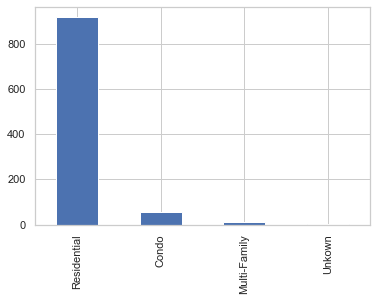

In [30]:
house['type'].value_counts().plot(kind='bar');

<AxesSubplot:>

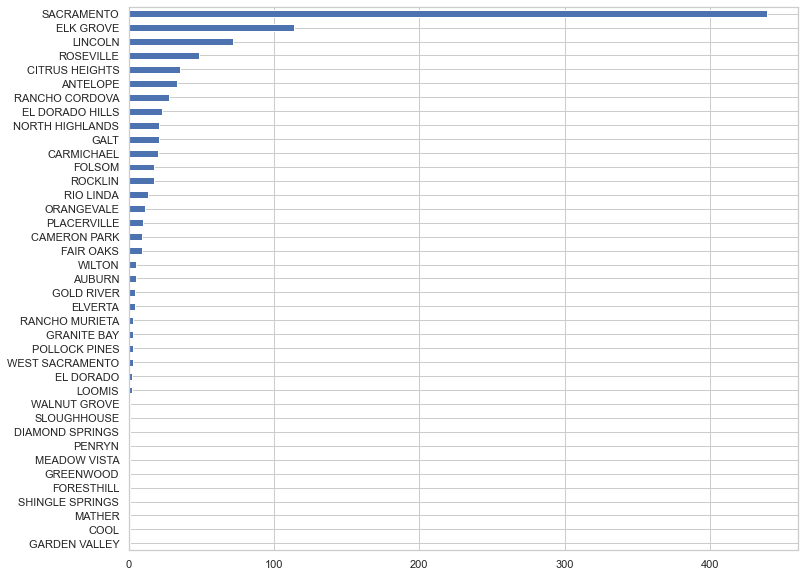

In [34]:
house['city'].value_counts().sort_values().plot(kind = 'barh', figsize = (12,10))

In [37]:
house.loc[house['beds'] == 0, 'type'] = 'plot'

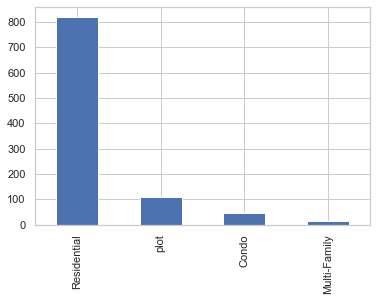

In [38]:
house['type'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

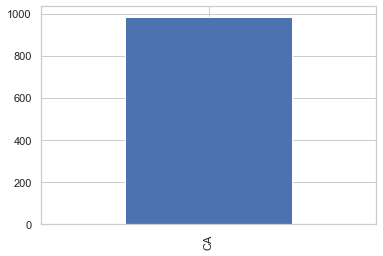

In [40]:
house['state'].value_counts().plot(kind = 'bar')

In [41]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
# ANSWER
#Price is a target variable in this case because we are trying to predict the price and use the other variables to do so

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [32]:
# ANSWER
#street
#beds
#baths
#sq_ft
#type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [42]:
# ANSWER
house.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


In [ ]:
#sq__ft is the best predictor as it got good correlation with beds and baths

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [43]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [47]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
Y = house['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [49]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [50]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [51]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [39]:
# ANSWER
## Check training/test data

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [40]:
# ANSWER

In [41]:
# ANSWER

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [42]:
# ANSWER

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



